<h3>Install Library Open CV dan imutils</h3>

In [ ]:
!pip install opencv-python
!pip install imutils

<h3>Import library</h3>

In [49]:
# import library keras
import keras

# import library open computer vision
import cv2

# import library komputasi numerik
import numpy as np

# import ilbrary pendukung open cv untuk keperluan manajemen data
from imutils import paths

<h3>Load gambarnya</h3>

In [50]:
# siapkan variabel kosong untuk menampung gambarnya
data = []

# siapkan variabel kosong untuk menampung label yang akan diprediksi
labels = []

# load dataset gambarnya dari path 'dataset/animals/'
dataset_path = 'datasets/animals/'
imagePaths = sorted(list(paths.list_images(dataset_path)))

# masukan data gambar hasil load tadi satu persatu ke dalam variabel data yang kosong tadi
for imagePath in imagePaths:
    
    # baca gambarnya
    img = cv2.imread(imagePath)
    
    
    
    # ubah ukuran / dimensi gambarnya menjadi 32x32 px, serta convert ke dalam format vektor
    img_flat = cv2.resize(img, (32,32))
    
    # simpan / tumpuk gambar yang sudah dibaca tadi
    data.append(img_flat)    
    
    # baca labelnya dengan melihat path foldernya
    label = imagePath.split(os.path.sep)[-2]
    
    # simpan / tumpuk label yang sudah dibaca tadi 
    labels.append(label)

# ubah data label tadi menjadi format array agar lebih memudahkan dalam komputasi
lbl = np.array(labels)

# ubah var data menjadi array numpy agar lebih memudahkan dalam komputasi
dt = np.array(data, dtype='float32')

<h3>Lihat salah satu gambarnya</h3>

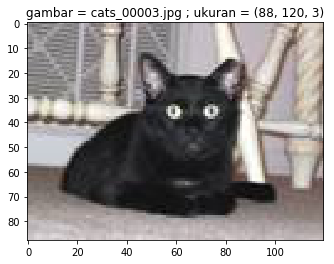

In [51]:
# import library matplotlib untuk melihat gambarnya
import matplotlib.pyplot as plt

# coba kita lihat sebuah gambar pada indeks ke-2 pada iamgePaths
gambar = imagePaths[2]

# baca gambarnya
gbr = plt.imread(gambar)

# tambahkan judul yang dilengkapi dengan nama file gambarnya + dimensi asli gambarnya 
plt.title('gambar = '+str(gambar.split('/')[3])+' ; ukuran = '+str(gbr.shape))

# munculkan 
plt.imshow(gbr)

<h3>Cek ukuran / dimensi gambarnya berapa</h3>

In [52]:
print('dimensi        : ', dt.shape)
print('jumlah gambar  : ', dt.shape[0])
print('Ukuran gambar  : ', dt.shape[1])

dimensi        :  (3000, 32, 32, 3)
jumlah gambar  :  3000
Ukuran gambar  :  32


<h4>pecah data yang sudah diload tadi menjadi 2 bagian yaitu</h4>
<h4>1) bagian train</h4>
<li>X Train</li>
<li>Y Train</li>
<h4>2) bagian Test</h4>
<li>X Test</li>
<li>Y Test</li>
<h5>X = data input ; Y = label/output</h5>

In [53]:
# import library untuk memecah datasetnya menjadi bagian train dan test
from sklearn.model_selection import train_test_split

# pecah datasetnya dengan jumlah data testing sebanyak 25% dari keseluruhan total data
x_train, x_test, y_train, y_test = train_test_split(dt, lbl, 
                                                    test_size=0.25, 
                                                    random_state=42)

# cek apakah sudah benar atau belum pemecaannya
print('x_train : ',x_train.shape)
print('x_test  : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test  : ', y_test.shape)

x_train :  (2250, 32, 32, 3)
x_test  :  (750, 32, 32, 3)
y_train :  (2250,)
y_test  :  (750,)


### Normalisai Data

In [54]:
# ubah tipe data gambarnya ke float
x_train = x_train.astype('float')
x_test = x_test.astype('float')

# normalisasi data gambarnya agar setiap nilai pixel memiliki rentang dari 0 sampai 1
x_train = x_train / 255
x_test = x_test / 255

<h3>Lakukan one hot enconding</h3>

In [56]:
# import library untuk melakukan one-hot-encoding dengan memanfaatkan method LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

# membuat object construktur
lb = LabelBinarizer()

# memulai melakukan one-hot-encoding untuk y_train dan y_test
y_train_encoded = lb.fit_transform(y_train)
y_test_encoded  = lb.transform(y_test)

# cek nilainya
y_test_encoded

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

<h3>Buat layer NN sederhana saja</h3>
<img src="arsitektur_nn_sederhana.png" height="800" width="350">

In [57]:
# import layer model sebagai cara memembuat model NN-nya
from keras.models import Model

# import layer Input dan Linear layer (Dense layer)
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

# tentukan jumlah node dari input layer dan output layer
data_input  = x_train.shape[1:]
data_output = 3

# mulai membuat arsitektur NN dengan tipe fully connected layer
input_layer    = Input(shape=(data_input))
conv_layer_1 = Conv2D(8, kernel_size=(3,3), padding='SAME', activation='relu', name='conv_layer_1')(input_layer)
maxpool_1 = MaxPooling2D(pool_size=(2,2), name='maxpooling_1')(conv_layer_1)
conv_layer_2 = Conv2D(16, kernel_size=(3,3), padding='SAME', activation='relu', name='conv_layer_2')(maxpool_1)
maxpool_2 = MaxPooling2D(pool_size=(2,2), name='maxpooing_2')(conv_layer_2)

flatten_layer = Flatten(name='flatten_layer')(maxpool_2)
full_con_layer = Dense(512, activation='relu', name='fully_connected_layer')(flatten_layer)
output_layer = Dense(data_output, activation='softmax', name='output_layer')(full_con_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 32, 32, 8)         224       
_________________________________________________________________
maxpooling_1 (MaxPooling2D)  (None, 16, 16, 8)         0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 16, 16, 16)        1168      
_________________________________________________________________
maxpooing_2 (MaxPooling2D)   (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 1024)              0         
_________________________________________________________________
fully_connected_layer (Dense (None, 512)               524800    
__________

<h3> Atur jenis loss function, optimizer dan metrics </h3>

In [58]:
# import library optimizer, sebagai contoh SGD optimizer
from keras.optimizers import SGD

# tentukan nilai learning-rate untuk optimizer yang digunakan
opt = SGD(lr=0.001)

# compile model dan tentukan fungsi loss, optimizer dan metriks pengujian model yang akan dilatih
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

<h3> Mulai training dengan 20 iterasi </h3>

In [59]:
# memulai pelatihan
history = model.fit(x_train, y_train_encoded, 
                     validation_data=(x_test, y_test_encoded),
                     batch_size=32, 
                     epochs=20)

Train on 2250 samples, validate on 750 samples
Epoch 1/20
2250/2250 [==============================] - 2s 964us/step - loss: 1.0978 - acc: 0.3498 - val_loss: 1.0895 - val_acc: 0.3960
Epoch 2/20
2250/2250 [==============================] - 2s 815us/step - loss: 1.0906 - acc: 0.3680 - val_loss: 1.0833 - val_acc: 0.4227
Epoch 3/20
2250/2250 [==============================] - 2s 836us/step - loss: 1.0842 - acc: 0.4142 - val_loss: 1.0762 - val_acc: 0.4587
Epoch 4/20
2250/2250 [==============================] - 2s 856us/step - loss: 1.0778 - acc: 0.4480 - val_loss: 1.0701 - val_acc: 0.4733
Epoch 5/20
2250/2250 [==============================] - 2s 776us/step - loss: 1.0711 - acc: 0.4658 - val_loss: 1.0634 - val_acc: 0.4920
Epoch 6/20
2250/2250 [==============================] - 2s 786us/step - loss: 1.0638 - acc: 0.4880 - val_loss: 1.0563 - val_acc: 0.5053
Epoch 7/20
2250/2250 [==============================] - 2s 755us/step - loss: 1.0563 - acc: 0.4978 - val_loss: 1.0481 - val_acc: 0.5067
E

### Lihat hasil ujiannya (evaluation)

In [ ]:
from sklearn.metrics import classification_report
akurasi = model.evaluate(x_test, y_test_encoded)[0]
loss = model.evaluate(x_test, y_test_encoded)[1]
print()
print('akurasi : %.2f%%' % (akurasi))
print('loss    : %.2f%%' % loss, '\n')

prediksi = model.predict(x_test)
print(classification_report(y_test_encoded.argmax(axis = 1), prediksi.argmax(axis = 1), target_names=lb.classes_))

<h3> Lihat grafik akurasi dan loss nya </h3>

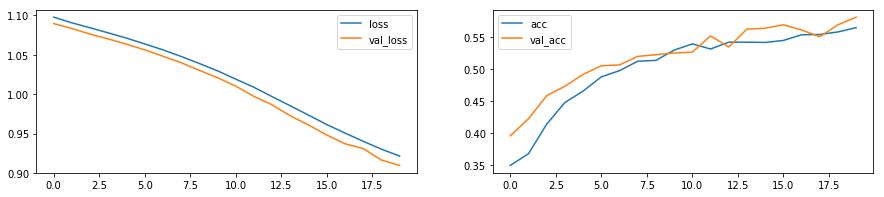

In [61]:
# nilai-nilai loss-nya
loss = history.history['loss']

# nilai-nilai val_loss-nya
val_loss = history.history['val_loss']

# nilai-nilai akurasi-nya
acc = history.history['acc']

# nilai-nilai val_acc-nya
val_acc = history.history['val_acc']

# menentukan sumbu x nya dari 0 sampai dengan banyaknya jumlah nilai loss/acc
sumbu_x = np.arange(0, len(loss))

# memasukan library plotting (matplotlib)
import matplotlib.pyplot as plt

# grafik plot untuk melihat loss
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(sumbu_x, loss, label='loss')
plt.plot(sumbu_x, val_loss, label='val_loss')
plt.legend()

# grafik plot untuk melihat akurasinya
plt.subplot(1,2,2)
plt.plot(sumbu_x, acc, label='acc')
plt.plot(sumbu_x, val_acc, label='val_acc')
plt.legend()
plt.show()

### Simpan model dan label

In [62]:
# simpan model keras / nn - nya ke dalam format h5
model.save('model_cnn.h5')

# simpan label - nya ke dalam format pickle
import pickle
f = open('lable.pickle', 'wb')
f.write(pickle.dumps(lb))
f.close()
print('done')

done
